In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# pro-dem entropy

In [44]:
df = pd.read_csv('df.csv')

In [45]:
import ast

df = df[~df.hashtag_names.isna()]
df['hashtags'] = df['hashtag_names'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
type(df['hashtags'].iloc[1])


list

In [46]:
df.columns

Index(['Unnamed: 0.1', 'id', 'pro_democrat', 'against_democrat',
       'pro_republican', 'against_republican', 'pro_biden', 'against_biden',
       'pro_trump', 'against_trump', 'pro_kamala', 'against_kamala',
       'Unnamed: 0', 'hashtag_names', 'like_count', 'music_id',
       'video_description', 'username', 'view_count', 'comment_count',
       'create_time', 'region_code', 'share_count', 'voice_to_text',
       'effect_ids', 'playlist_id', 'tiktokurl', 'hashtags'],
      dtype='object')

In [47]:
df_pro_dem = df[df.pro_democrat == 1]
df_pro_dem = df_pro_dem.explode('hashtags')
df_pro_dem = df_pro_dem[['username', 'hashtags']]
df_pro_dem

,username,hashtags
2,repmorales145,houston
2,repmorales145,democracy
2,repmorales145,harriscounty
2,repmorales145,democrats
2,repmorales145,fairness
...,...,...
545511,jackmelancon888,freepalestine🇵🇸❤️
545514,granitepost,aca
545514,granitepost,manchesternh
545514,granitepost,nhpolitics


In [48]:
df_pro_dem.username = df_pro_dem.username.apply(lambda x: x[1:])
df_pro_dem

a = np.hstack((df_pro_dem.username.values, df_pro_dem.hashtags.values))
factors, uniq = pd.factorize(a)
E = factors.reshape(2, int(len(factors)/2)).T
pair, counts = np.unique(E, return_counts=True, axis=0)
E = np.hstack((pair,np.atleast_2d(counts).T))
E = pd.DataFrame(E, columns = ["u1","u2","weight"])
E = E[E.u1 != E.u2]

In [49]:
E2 = E[E.weight>1]
E2.shape

(196467, 3)

In [50]:
%%time
H = lambda p: - sum((np.log2(p)*p))
df_pro_dem = pd.DataFrame({
    'u1': [],
    'total_hashtags' :[],
    'entropy': []
})
index = 0

for i, ddf in E2.groupby("u1"):
    if len(ddf) > 1:
        p = ddf.weight / ddf.weight.sum()
        entropy = H(p)
        df_pro_dem.loc[index] = [i, ddf.weight.sum(), entropy]
        index += 1

df_pro_dem

CPU times: user 8.7 s, sys: 244 µs, total: 8.71 s
Wall time: 8.71 s


,u1,total_hashtags,entropy
0,0.0,18.0,3.169925
1,1.0,4237.0,4.999761
2,2.0,204.0,4.854605
3,3.0,12.0,2.584963
4,4.0,3238.0,5.003830
...,...,...,...
13449,31533.0,12.0,2.584963
13450,31552.0,4.0,1.000000
13451,31609.0,10.0,2.321928
13452,31670.0,6.0,1.584963


In [51]:
df_pro_dem["ent_rounded"] = np.round(df_pro_dem.entropy, 2)

df_pro_dem_entropy = df_pro_dem.ent_rounded.value_counts().reset_index()
df_pro_dem_entropy = df_pro_dem_entropy.reset_index()

df_pro_dem_entropy = df_pro_dem_entropy.sort_values("ent_rounded")
df_pro_dem_entropy["prop"] = df_pro_dem_entropy.ent_rounded / df_pro_dem_entropy.ent_rounded.sum()
df_pro_dem_entropy["cum_freq"] = df_pro_dem_entropy.prop.cumsum()

In [54]:
df_pro_dem_entropy

,level_0,index,ent_rounded,prop,cum_freq
604,604,6.79,1,0.000074,0.000074
525,525,7.97,1,0.000074,0.000149
526,526,1.39,1,0.000074,0.000223
527,527,7.67,1,0.000074,0.000297
528,528,6.63,1,0.000074,0.000372
...,...,...,...,...,...
4,4,2.58,648,0.048164,0.776423
3,3,2.32,735,0.054631,0.831054
2,2,1.00,737,0.054779,0.885833
1,1,1.58,764,0.056786,0.942619


# pro repub entropy

In [26]:
df_pro_rep = df[df.pro_republican == 1]
df_pro_rep = df_pro_rep.explode('hashtags')
df_pro_rep = df_pro_rep[['hashtags', 'username']]
df_pro_rep

,hashtags,username
0,newyork,imjustamerican
0,ny,imjustamerican
0,democracy,imjustamerican
0,democrat,imjustamerican
0,ericadams,imjustamerican
...,...,...
545476,goviral,birdonecreations
545476,fyp,birdonecreations
545476,election,birdonecreations
545476,goviraltiktok,birdonecreations


In [27]:
df_pro_rep.username = df_pro_rep.username.apply(lambda x: x[1:])
df_pro_rep

a = np.hstack((df_pro_rep.username.values, df_pro_rep.hashtags.values))
factors, uniq = pd.factorize(a)
E = factors.reshape(2, int(len(factors)/2)).T
pair, counts = np.unique(E, return_counts=True, axis=0)

E = np.hstack((pair,np.atleast_2d(counts).T))
E = pd.DataFrame(E, columns = ["u1","u2","weight"])
E = E[E.u1 != E.u2]

In [28]:
E2 = E[E.weight>1]
E2.shape

(275499, 3)

In [29]:
%%time
H = lambda p: - sum((np.log2(p)*p))
df_ac = pd.DataFrame({
    'u1': [],
    'total_comments' :[],
    'entropy': []
})
index = 0

for i, ddf in E2.groupby("u1"):
    if len(ddf) > 1:
        p = ddf.weight / ddf.weight.sum()
        entropy = H(p)
        df_ac.loc[index] = [i, ddf.weight.sum(), entropy]
        index += 1

df_ac

CPU times: user 12.8 s, sys: 2.08 ms, total: 12.8 s
Wall time: 12.8 s


,u1,total_comments,entropy
0,0.0,233.0,4.905016
1,1.0,50.0,3.708493
2,2.0,974.0,5.531186
3,4.0,442.0,4.018535
4,5.0,75.0,4.690653
...,...,...,...
20301,50811.0,48.0,3.584963
20302,50813.0,12.0,2.584963
20303,50838.0,12.0,2.584963
20304,50839.0,4.0,1.000000


In [30]:
df_ac["ent_rounded"] = np.round(df_ac.entropy, 2)

df_ac_entropy = df_ac.ent_rounded.value_counts().reset_index()
df_ac_entropy = df_ac_entropy.reset_index()

df_ac_entropy = df_ac_entropy.sort_values("ent_rounded")
df_ac_entropy["prop"] = df_ac_entropy.ent_rounded / df_ac_entropy.ent_rounded.sum()
df_ac_entropy["cum_freq"] = df_ac_entropy.prop.cumsum()

# against repub entropy

In [56]:
df_anti_rep = df[df.against_republican == 1]
df_anti_rep = df_anti_rep.explode('hashtags')
df_anti_rep = df_anti_rep[['hashtags', 'username']]
df_anti_rep

,hashtags,username
7,freedom,corrie922
7,donaldtrump,corrie922
7,foryou,corrie922
7,democracy,corrie922
7,unstoppable,corrie922
...,...,...
545512,NaN,jwilliamj
545514,aca,granitepost
545514,manchesternh,granitepost
545514,nhpolitics,granitepost


In [57]:
df_anti_rep.username = df_anti_rep.username.apply(lambda x: x[1:])
df_anti_rep

a = np.hstack((df_anti_rep.username.values, df_anti_rep.hashtags.values))
factors, uniq = pd.factorize(a)
E = factors.reshape(2, int(len(factors)/2)).T
pair, counts = np.unique(E, return_counts=True, axis=0)

E = np.hstack((pair,np.atleast_2d(counts).T))
E = pd.DataFrame(E, columns = ["u1","u2","weight"])
E = E[E.u1 != E.u2]

In [58]:
E2 = E[E.weight>1]
E2.shape

(193393, 3)

In [59]:
%%time
H = lambda p: - sum((np.log2(p)*p))
df_dbd = pd.DataFrame({
    'u1': [],
    'total_comments' :[],
    'entropy': []
})
index = 0

for i, ddf in E2.groupby("u1"):
    if len(ddf) > 1:
        p = ddf.weight / ddf.weight.sum()
        entropy = H(p)
        df_dbd.loc[index] = [i, ddf.weight.sum(), entropy]
        index += 1

df_dbd

CPU times: user 7.97 s, sys: 12.7 ms, total: 7.98 s
Wall time: 7.97 s


,u1,total_comments,entropy
0,0.0,4237.0,4.999761
1,1.0,185.0,4.745228
2,2.0,3238.0,5.003830
3,3.0,24.0,3.000000
4,4.0,148.0,5.094169
...,...,...,...
11925,25963.0,20.0,3.321928
11926,25987.0,18.0,2.584963
11927,26018.0,10.0,2.321928
11928,26057.0,28.0,3.807355


In [60]:
df_dbd["ent_rounded"] = np.round(df_dbd.entropy, 2)

df_dbd_entropy = df_dbd.ent_rounded.value_counts().reset_index()
df_dbd_entropy = df_dbd_entropy.reset_index()

df_dbd_entropy = df_dbd_entropy.sort_values("ent_rounded")
df_dbd_entropy["prop"] = df_dbd_entropy.ent_rounded / df_dbd_entropy.ent_rounded.sum()
df_dbd_entropy["cum_freq"] = df_dbd_entropy.prop.cumsum()

## against democrat entropy

In [62]:
df_anti_dem = df[df.against_democrat == 1]
df_anti_dem = df_anti_dem.explode('hashtags')
df_anti_dem = df_anti_dem[['hashtags', 'username']]
df_anti_dem

,hashtags,username
0,newyork,imjustamerican
0,ny,imjustamerican
0,democracy,imjustamerican
0,democrat,imjustamerican
0,ericadams,imjustamerican
...,...,...
545497,houseoftiktok,hubert.j.farnsworth
545497,tikokban,hubert.j.farnsworth
545497,2024election,hubert.j.farnsworth
545497,votethemout2024,hubert.j.farnsworth


In [63]:
df_anti_dem.username = df_anti_dem.username.apply(lambda x: x[1:])
df_anti_dem

a = np.hstack((df_anti_dem.username.values, df_anti_dem.hashtags.values))
factors, uniq = pd.factorize(a)
E = factors.reshape(2, int(len(factors)/2)).T
pair, counts = np.unique(E, return_counts=True, axis=0)

E = np.hstack((pair,np.atleast_2d(counts).T))
E = pd.DataFrame(E, columns = ["u1","u2","weight"])
E = E[E.u1 != E.u2]

In [64]:
E2 = E[E.weight>1]
E2.shape

(212923, 3)

In [65]:
%%time
H = lambda p: - sum((np.log2(p)*p))
df_anti_dem = pd.DataFrame({
    'u1': [],
    'total_comments' :[],
    'entropy': []
})
index = 0

for i, ddf in E2.groupby("u1"):
    if len(ddf) > 1:
        p = ddf.weight / ddf.weight.sum()
        entropy = H(p)
        df_anti_dem.loc[index] = [i, ddf.weight.sum(), entropy]
        index += 1

df_anti_dem

CPU times: user 9.15 s, sys: 4.63 ms, total: 9.16 s
Wall time: 9.16 s


,u1,total_comments,entropy
0,0.0,529.0,5.571316
1,1.0,45.0,3.709342
2,2.0,752.0,5.423309
3,3.0,24.0,3.000000
4,5.0,490.0,3.999473
...,...,...,...
13962,32360.0,16.0,3.000000
13963,32374.0,22.0,3.459432
13964,32389.0,28.0,3.807355
13965,32439.0,10.0,2.321928


In [66]:
df_anti_dem["ent_rounded"] = np.round(df_anti_dem.entropy, 2)

df_anti_dem_entropy = df_anti_dem.ent_rounded.value_counts().reset_index()
df_anti_dem_entropy = df_anti_dem_entropy.reset_index()

df_anti_dem_entropy = df_anti_dem_entropy.sort_values("ent_rounded")
df_anti_dem_entropy["prop"] = df_anti_dem_entropy.ent_rounded / df_anti_dem_entropy.ent_rounded.sum()
df_anti_dem_entropy["cum_freq"] = df_anti_dem_entropy.prop.cumsum()

## Plot

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400')])

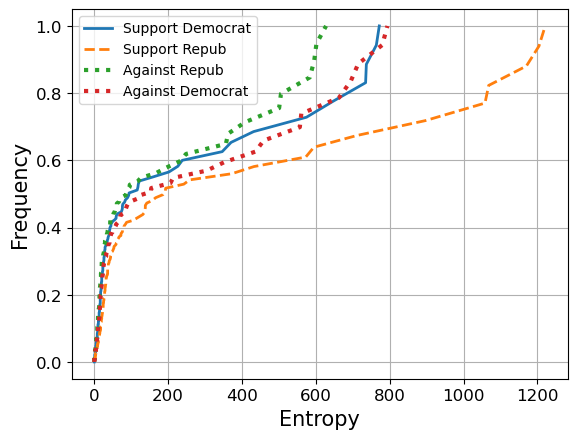

In [67]:
plt.plot(df_valo_entropy.ent_rounded, df_valo_entropy.cum_freq, label = 'Support Democrat', linestyle= '-', linewidth = 2)
plt.plot(df_ac_entropy.ent_rounded, df_ac_entropy.cum_freq, label = 'Support Repub', linestyle='--', linewidth = 2)
plt.plot(df_dbd_entropy.ent_rounded, df_dbd_entropy.cum_freq, label = 'Against Repub', linestyle = ':', linewidth = 3)
plt.plot(df_anti_dem_entropy.ent_rounded, df_anti_dem_entropy.cum_freq, label = 'Against Democrat', linestyle = ':', linewidth = 3)

plt.legend(fontsize = 10)
plt.grid()
plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Entropy', fontsize = 15)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)


In [21]:
df_valo_entropy.to_csv('valo_entropy.csv')
df_ac_entropy.to_csv('ac_entropy.csv')
df_dbd_entropy.to_csv('dbd_entropy.csv')

